In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_json("training_results_final.json")

In [3]:
df.head(5)

,timestamps,episode_lengths,episode_rewards,steps
0,2.565155,17,-1254.832185,17
1,4.150579,14,-1223.233590,31
2,4.678560,8,-1108.376223,39
3,5.241709,8,-1112.456384,47
4,6.201414,18,-1286.628009,65


In [4]:
df.describe()

,timestamps,episode_lengths,episode_rewards,steps
count,651.000000,651.000000,651.000000,651.000000
mean,27443.656286,27.737327,-1100.181429,9251.239631
std,16580.700395,28.339428,473.467622,5194.485525
min,2.565155,4.000000,-2111.926114,17.000000
25%,14289.138163,9.000000,-1281.480853,5151.000000
50%,27474.776623,16.000000,-1172.525749,9406.000000
75%,40914.781592,33.000000,-1102.560020,13615.500000
max,56523.598207,144.000000,2020.289367,18057.000000


In [5]:
df.iloc[df["episode_rewards"].idxmax(), :]

timestamps         47319.880834
episode_lengths      104.000000
episode_rewards     2020.289367
steps              15361.000000
Name: 551, dtype: float64

<Figure size 432x288 with 0 Axes>

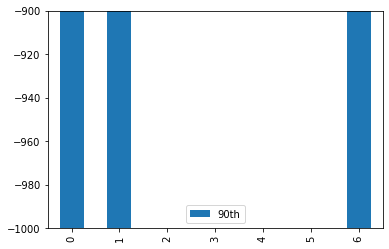

In [6]:
def process_stats(df):
    sep = 100
    splits = (len(df) // sep) + 1 
    df_stat = pd.DataFrame(columns=['90th'])
    for i in range(splits):
        if i == 0:
            df_stat = df_stat.append({'90th' : df["episode_rewards"][:sep].quantile(0.9)}, ignore_index=True)
        elif i == splits - 1:
            df_stat = df_stat.append({'90th' : df["episode_rewards"][sep*(i-1):].quantile(0.9)}, ignore_index=True)
        else:
            df_stat = df_stat.append({'90th' : df["episode_rewards"][sep*(i-1):sep*i].quantile(0.9)}, ignore_index=True)
    return df_stat

df_stat = process_stats(df)

plt.figure()
df_stat.plot.bar()
plt.ylim(-1000, -900)
plt.show()

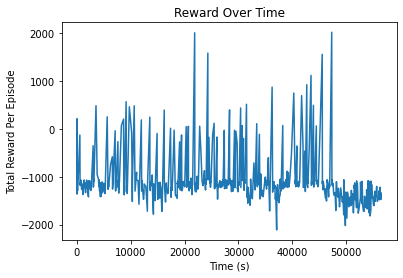

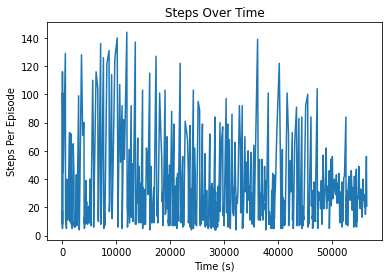

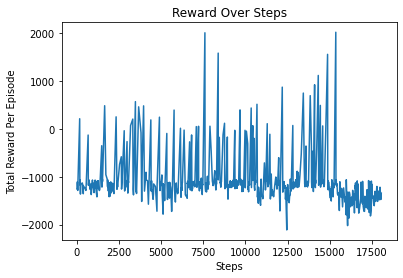

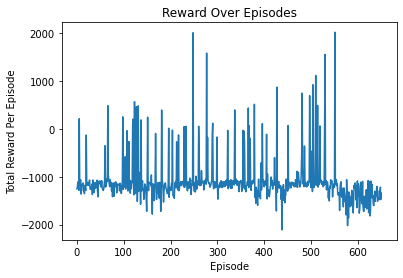

In [7]:
plt.figure()
plt.plot(df["timestamps"], df["episode_rewards"])
plt.xlabel("Time (s)")
plt.ylabel("Total Reward Per Episode")
plt.title("Reward Over Time")

plt.figure()
plt.plot(df["timestamps"], df["episode_lengths"])
plt.xlabel("Time (s)")
plt.ylabel("Steps Per Episode")
plt.title("Steps Over Time")

plt.figure()
plt.plot(df["steps"], df["episode_rewards"])
plt.xlabel("Steps")
plt.ylabel("Total Reward Per Episode")
plt.title("Reward Over Steps")

plt.figure()
plt.plot(df.index, df["episode_rewards"])
plt.xlabel("Episode")
plt.ylabel("Total Reward Per Episode")
plt.title("Reward Over Episodes")

plt.show()

In [8]:
from pathlib import Path
import glob
import os

# Read in airsim recording data from most recent test
airsim_dir = Path.home().joinpath("Documents").joinpath("AirSim")  # .joinpath("2020-11-23-23-48-57")
list_of_files = glob.glob(str(airsim_dir.joinpath('*')) + '/') # * means all if need specific format then *.csv
latest_file = max(list_of_files, key=os.path.getctime)
airsim_dir = Path().joinpath(latest_file)
filename = "airsim_rec.txt"
path = str(airsim_dir.joinpath(filename))
test = pd.read_csv(path, sep='\t', lineterminator='\n')

test.head()

,TimeStamp,POS_X,POS_Y,POS_Z,Q_W,Q_X,Q_Y,Q_Z,ImageFile
0,1609221432156,0.0,0.0,-1.997876,1.000000,-0.0,0.0,0.000000,img_front_center_custom_0_1607234243676976200.png
1,1609221440263,0.0,0.0,-1.995782,0.990189,0.0,0.0,-0.139737,img_front_center_custom_0_1607234245343311000.png
2,1609221448486,0.0,0.0,-1.995588,0.960838,0.0,0.0,-0.277109,img_front_center_custom_0_1607234245407760100.png
3,1609221457177,0.0,0.0,-1.995605,0.912181,0.0,0.0,-0.409732,img_front_center_custom_0_1607234245470224700.png
4,1609221468283,0.0,0.0,-1.996913,0.824059,0.0,0.0,-0.566504,img_front_center_custom_0_1607234245539465900.png


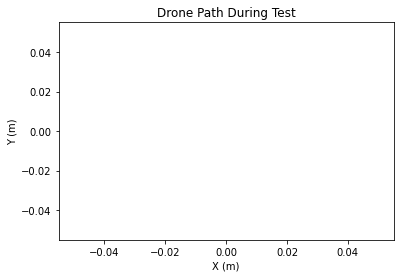

In [9]:
plt.figure()
plt.plot(test['POS_X'], test['POS_Y'])
plt.title('Drone Path During Test')
plt.xlabel("X (m)")
plt.ylabel("Y (m)")

plt.show()